# LOGISTIC REGRESSION

### ADVERTISING DATASET

#### BY ALKA PANDEY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad = pd.read_csv("advertising.csv")
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


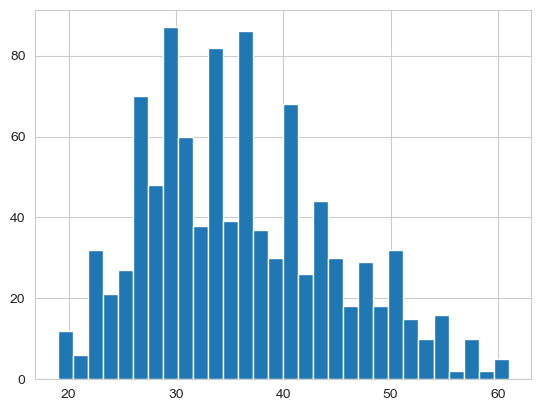

In [5]:
sns.set_style('whitegrid')
ad["Age"].hist(bins=30)
plt.show()

In [6]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

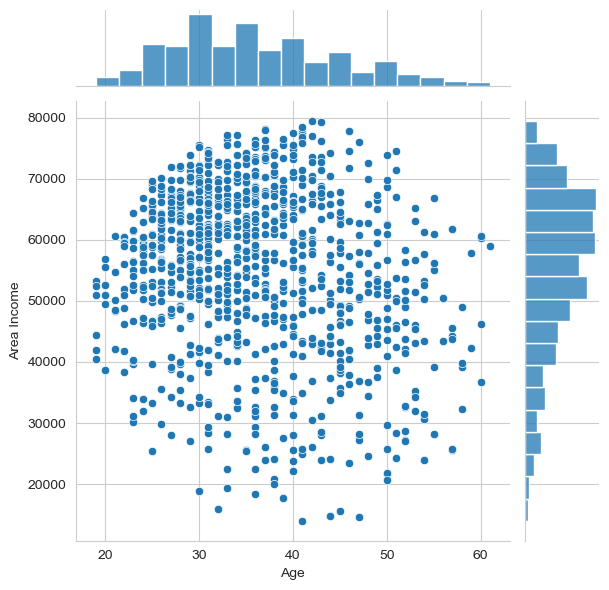

In [7]:
sns.jointplot(x="Age",y="Area Income",data=ad)
plt.show()

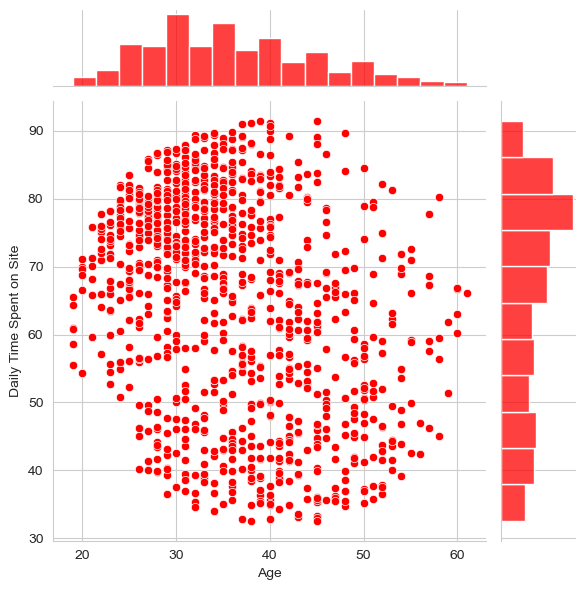

In [8]:
sns.jointplot(x="Age",y="Daily Time Spent on Site",data=ad,color="red")
plt.show()

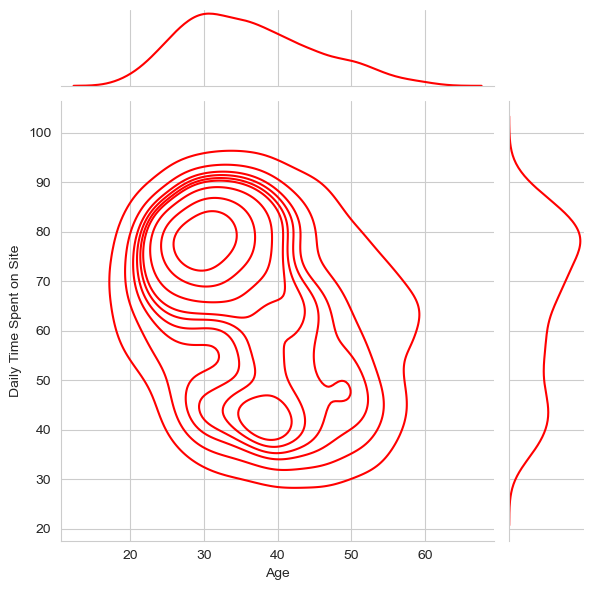

In [9]:
sns.jointplot(x="Age",y="Daily Time Spent on Site",data=ad,color="red",kind="kde")
plt.show()

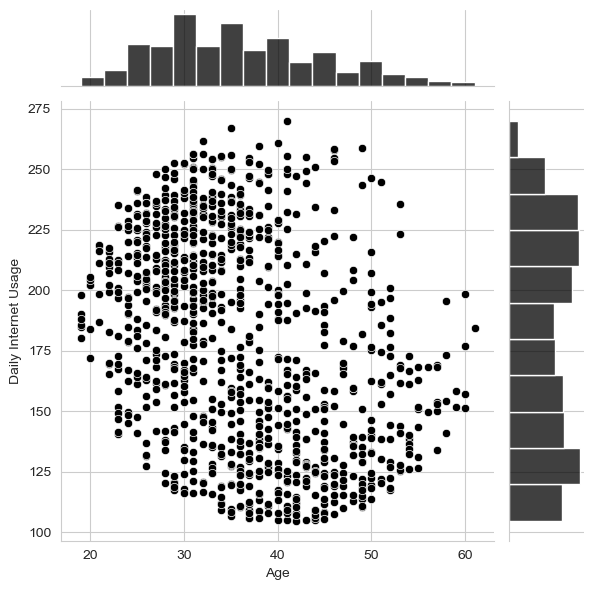

In [10]:
sns.jointplot(x="Age",y="Daily Internet Usage",data=ad,color="black")
plt.show()

C:\Users\alkap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


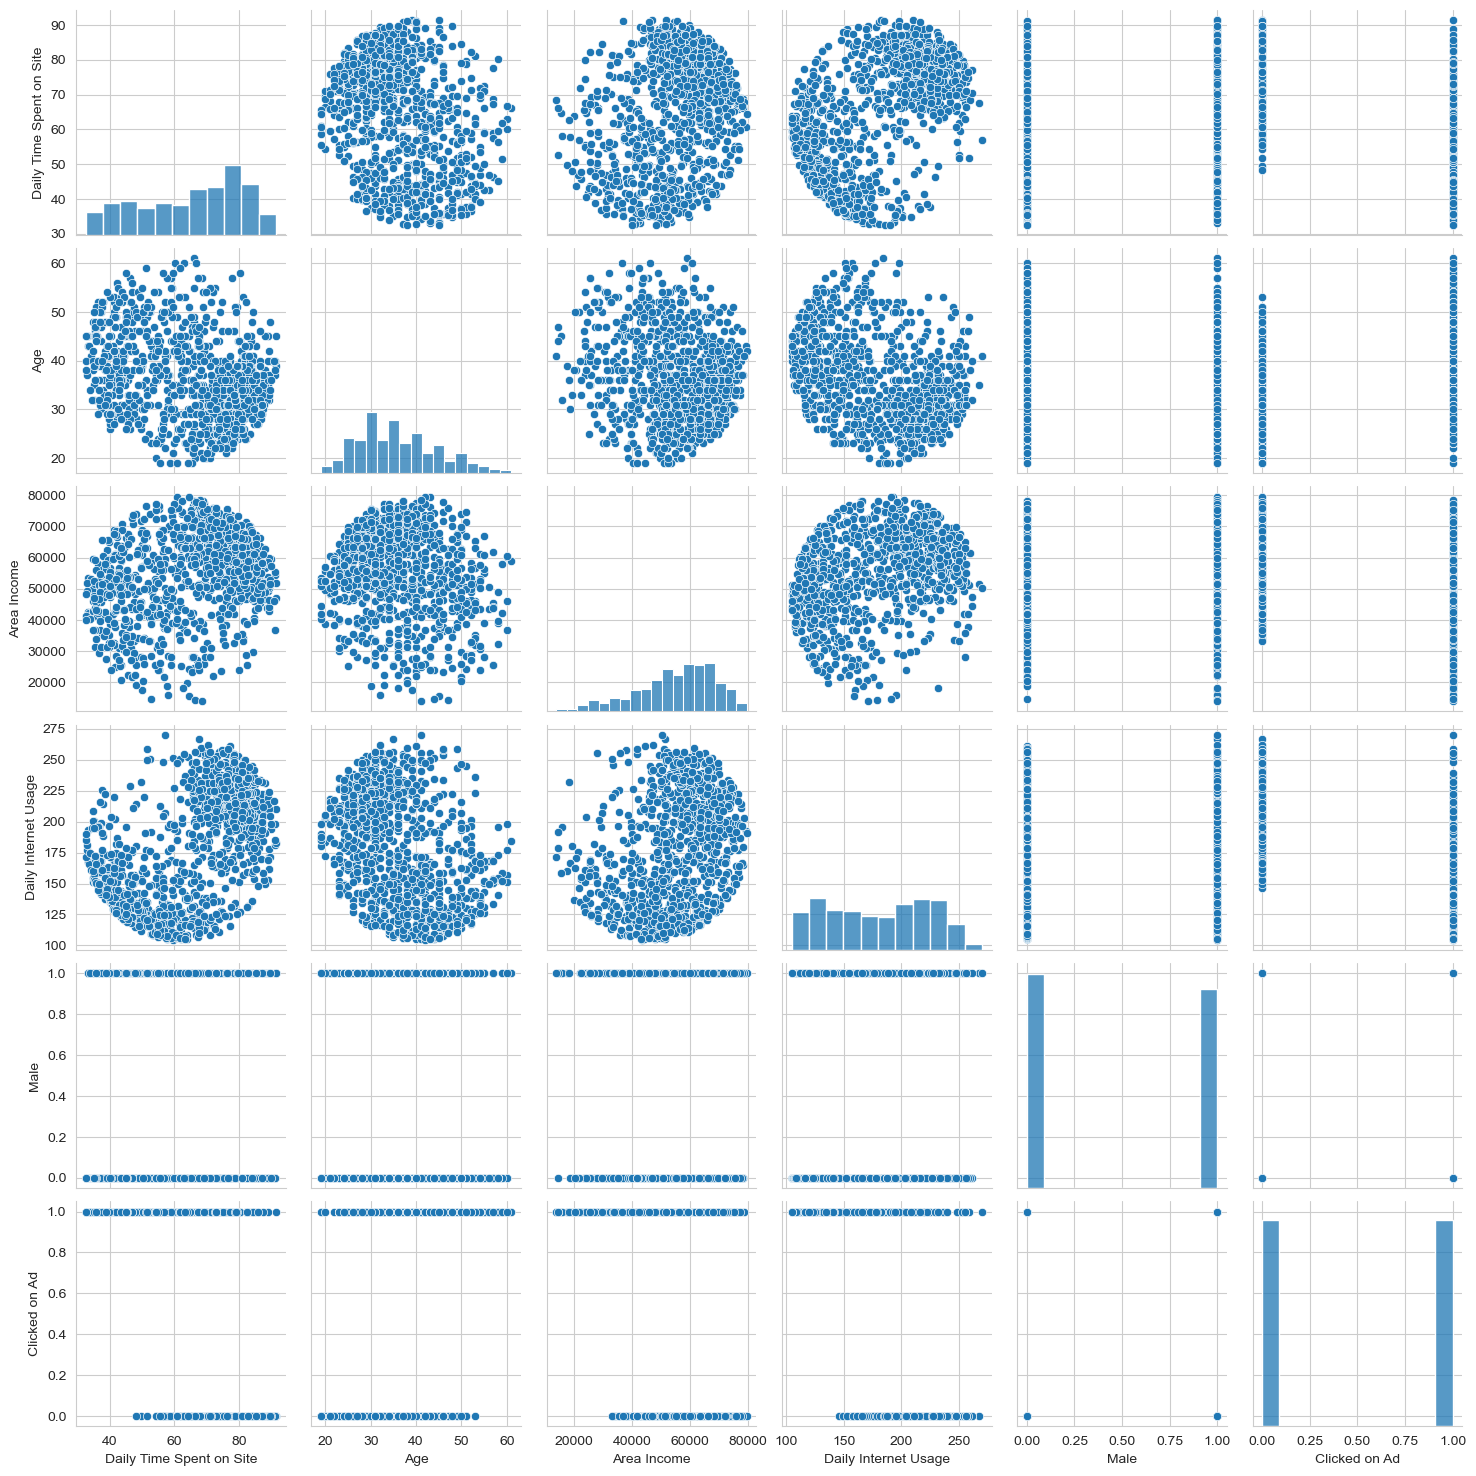

In [11]:
sns.pairplot(ad)
plt.show()

C:\Users\alkap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


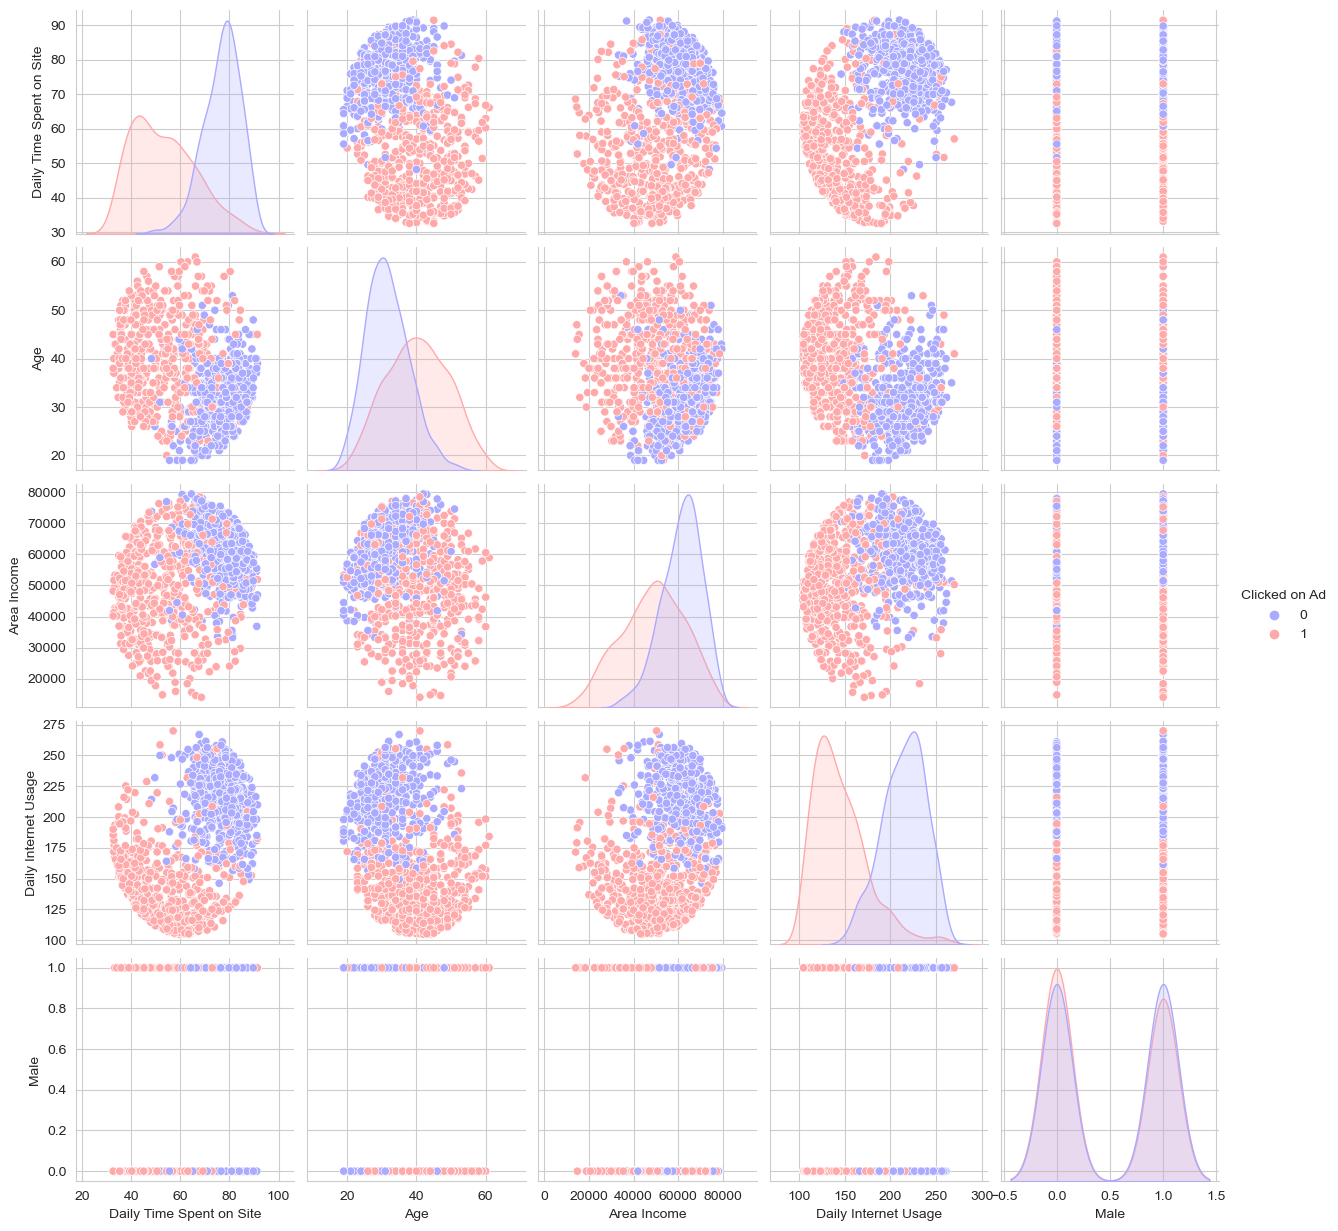

In [12]:
sns.pairplot(ad,hue="Clicked on Ad",palette='bwr')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

### MODEL 1

In [15]:
X = ad[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y= ad["Clicked on Ad"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       146
           1       0.94      0.84      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [18]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_pred)
print(c)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ",acc)

[[137   9]
 [ 24 130]]
Accuracy :  0.89


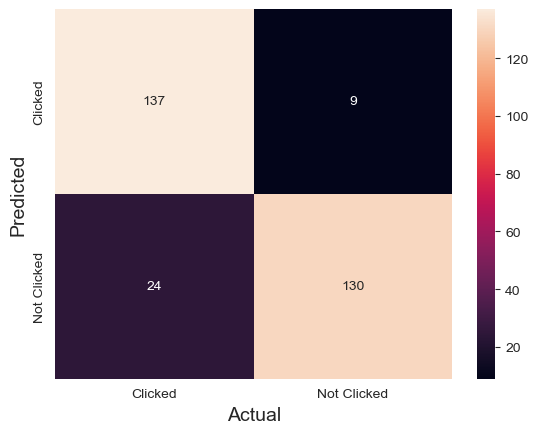

In [19]:
sns.heatmap(c,annot=True,xticklabels=["Clicked","Not Clicked"],yticklabels=["Clicked","Not Clicked"],fmt='g')
plt.ylabel("Predicted",fontsize="14")
plt.xlabel("Actual",fontsize="14")
plt.show()

### MODEL 2 

In [20]:
X = ad[['Daily Time Spent on Site','Age','Daily Internet Usage']]
y= ad["Clicked on Ad"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

lr2 = LogisticRegression()

lr2.fit(X_train,y_train)

y_pred = lr2.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       146
           1       0.96      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [22]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_pred)
print(c)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print("Accuracy : ",acc)

[[140   6]
 [ 10 144]]
Accuracy :  0.9466666666666667


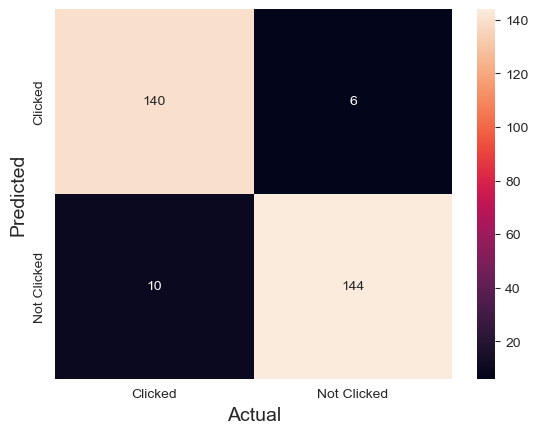

In [23]:
sns.heatmap(c,annot=True,xticklabels=["Clicked","Not Clicked"],yticklabels=["Clicked","Not Clicked"],fmt='g')
plt.ylabel("Predicted",fontsize="14")
plt.xlabel("Actual",fontsize="14")
plt.show()